In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
# Checking if there is empty of NAN values in the dataset
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: >

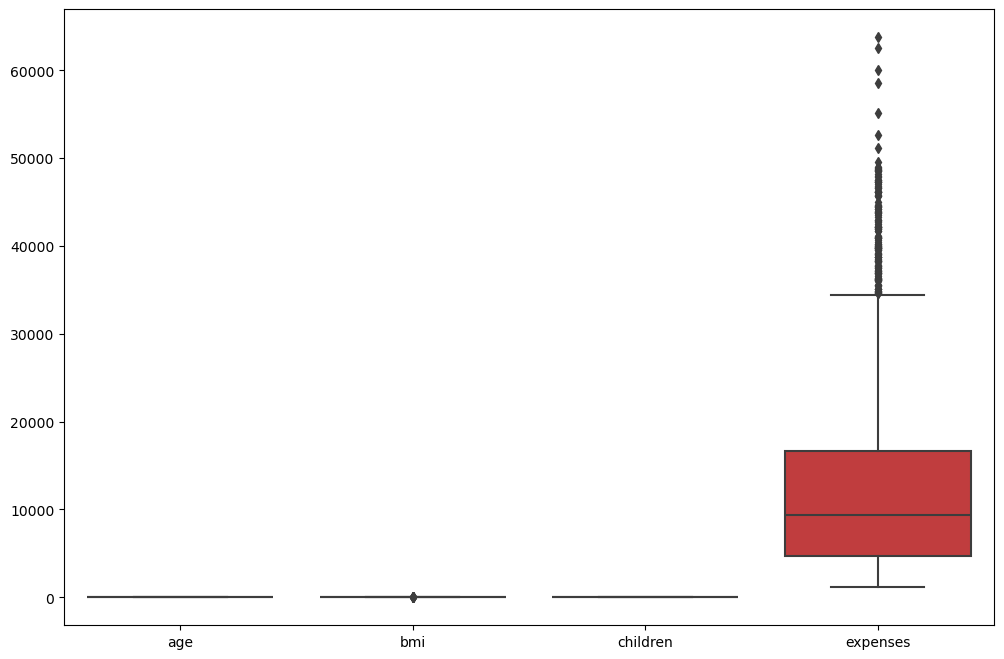

In [7]:
# Checking the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [9]:
# Calculating the unique number of values in each column
for column_name in df.columns:
    unique_values_count = len(df[column_name].unique())
    print(f"{column_name} - {unique_values_count}")

age - 47
sex - 2
bmi - 275
children - 6
smoker - 2
region - 4
expenses - 1337


In [10]:
# Explore the data and understand the distribution of values in each column
for column_name, column_data in df.items():
    print(column_data.value_counts())

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: count, Length: 275, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
expenses
1639.56     2
16884.92    1
29330.98    1
2221.56     1
19798.05    1

sex
male      676
female    662
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

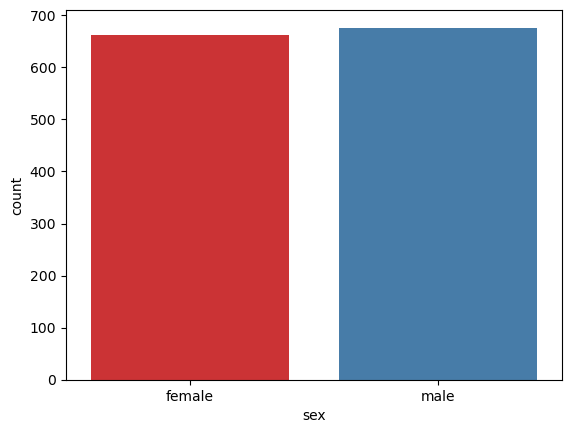

In [11]:
print(df['sex'].value_counts())
sns.countplot(x='sex',data = df, palette='Set1')

smoker
no     1064
yes     274
Name: count, dtype: int64


<Axes: xlabel='smoker', ylabel='count'>

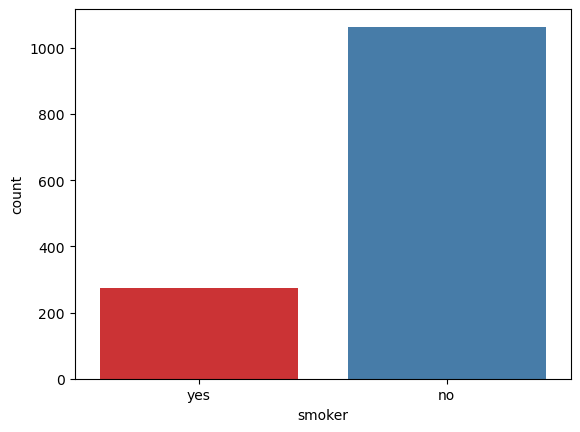

In [12]:
print(df['smoker'].value_counts())
sns.countplot(x='smoker',data = df, palette='Set1')

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


<Axes: xlabel='children', ylabel='count'>

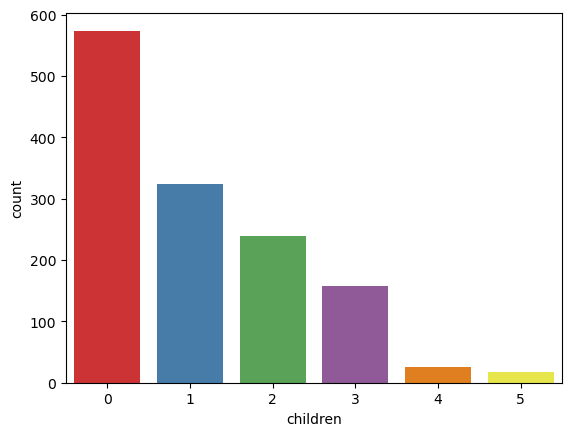

In [13]:
print(df['children'].value_counts())
sns.countplot(x='children',data = df, palette='Set1')

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


<Axes: xlabel='region', ylabel='count'>

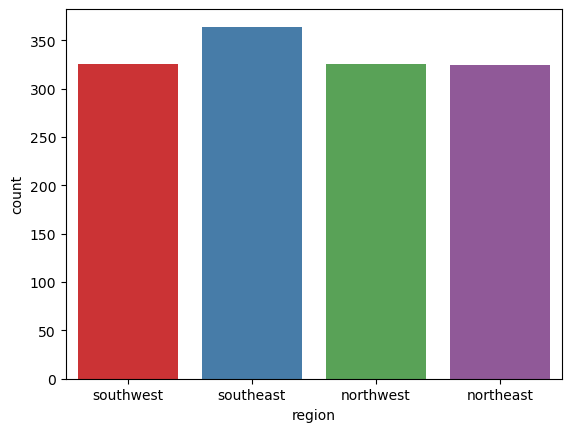

In [14]:
print(df['region'].value_counts())
sns.countplot(x='region',data = df, palette='Set1')

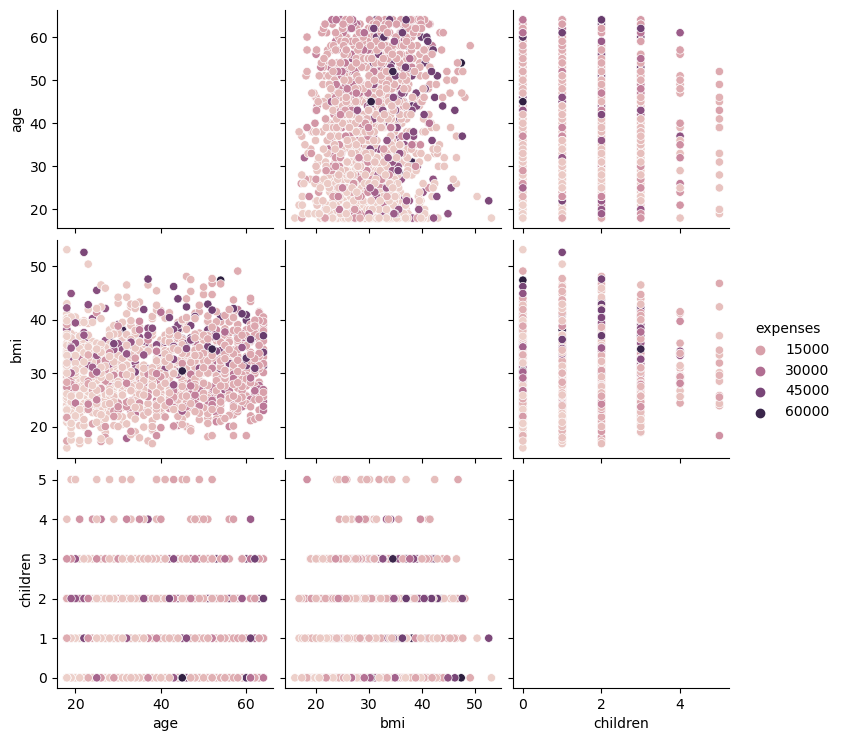

In [15]:
sns.pairplot(df, hue='expenses', diag_kind='kde')
plt.show()

In [16]:
# Converting categorical values into unique integer values

from sklearn.preprocessing import LabelEncoder
cols = ['sex','smoker','region']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [17]:
# Explore the data and understand the distribution of values in each column
for column_name, column_data in df.items():
    print(column_data.value_counts())

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
1    676
0    662
Name: count, dtype: int64
bmi
27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: count, Length: 275, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region
2    364
3    325
1    325
0    324
Name: count, dtype: int64
expenses
1639.56     2
16884.92    1
29330.98    1
2221.56     1
19798.05    1
           ..
7345.08     1
26109.33    1
282

In [18]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


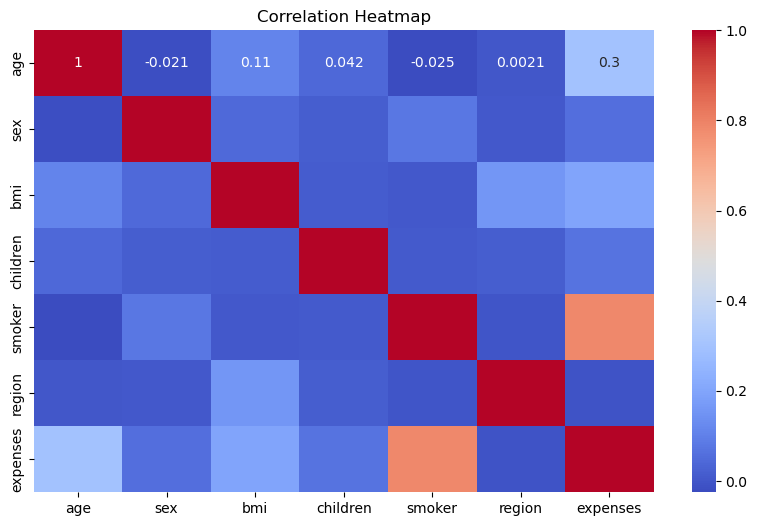

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('expenses', axis = 1)
y = df['expenses'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (1070, 6) (1070,)
Testing data shape: (268, 6) (268,)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error: ", mse_linear)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_linear)
print("R-squared (R2):" ,r2)

Linear Regression Mean Squared Error:  33639013.821695946
R-squared (R2): 0.7833214701433212


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
logistic_model = LogisticRegression(max_iter = 1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.018656716417910446


In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Initialize the model
degree = 2 # Set the degree of the polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

# Calculate mean squared error
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Polynomial Regression Mean Squared Error:", mse_poly)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_linear)
print("R-squared (R2):", r2)

Polynomial Regression Mean Squared Error: 20983119.41586349
R-squared (R2): 0.7833214701433212


In [24]:
from sklearn.svm import SVC

# Initialize the model
svc_model = SVC()

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred_svc = svc_model.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_logistic)

SVC Accuracy: 0.018656716417910446


In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors = 3)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNeighbors Accuracy:", accuracy_logistic)

KNeighbors Accuracy: 0.018656716417910446


In [26]:
#KNN Prediciton
# Selecting the first row of the DataFrame for prediction
df_subset = X.iloc[8:9].copy()

# Extracting the actual expenses from the original DataFrame
actual_expenses = y.iloc[0]

# Making predictions using the trained model
predicted_expenses = knn_model.predict(df_subset)[0]

# Output the predicted and actual expenses
print("Predicted expenses:", predicted_expenses)
print("Actual expenses:", actual_expenses)

Predicted expenses: 6406
Actual expenses: 16884


In [27]:
#Logistic Model Prediciton
# Selecting the first row of the DataFrame for prediction
df_subset = X.iloc[8:9].copy()

# Extracting the actual expenses from the original DataFrame
actual_expenses = y.iloc[0]

# Making predictions using the trained model
predicted_expenses = logistic_model.predict(df_subset)[0]

# Output the predicted and actual expenses
print("Predicted expenses:", predicted_expenses)
print("Actual expenses:", actual_expenses)

Predicted expenses: 6406
Actual expenses: 16884


In [28]:
#SVM Prediction
# Selecting the first row of the DataFrame for prediction
df_subset = X.iloc[8:9].copy()

# Extracting the actual expenses from the original DataFrame
actual_expenses = y.iloc[0]

# Making predictions using the trained model
predicted_expenses = svc_model.predict(df_subset)[0]

# Output the predicted and actual expenses
print("Predicted expenses:", predicted_expenses)
print("Actual expenses:", actual_expenses)

Predicted expenses: 6600
Actual expenses: 16884


In [29]:
#Linear Model Prediction
# Selecting the first row of the DataFrame for prediction
df_subset = X.iloc[8:9].copy()

# Extracting the actual expenses from the original DataFrame
actual_expenses = y.iloc[0]

# Making predictions using the trained model
predicted_expenses = linear_model.predict(df_subset)[0]

# Output the predicted and actual expenses
print("Predicted expenses:", predicted_expenses)
print("Actual expenses:", actual_expenses)

Predicted expenses: 8401.499851288687
Actual expenses: 16884


In [30]:
# Polynomial Prediction
# Selecting the first row of the DataFrame for prediction
df_subset = X.iloc[8:9].copy()

# Extracting the actual expenses from the original DataFrame
actual_expenses = y.iloc[0]

# Making predictions using the trained model
predicted_expenses = poly_model.predict(df_subset)[0]

# Output the predicted and actual expenses
print("Predicted expenses:", predicted_expenses)
print("Actual expenses:", actual_expenses)

Predicted expenses: 9774.3359375
Actual expenses: 16884
